In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Linear Regression Minimize Cost Function
seeing to this prediction equation:
>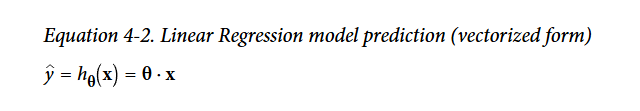

where:
>![alt text](image.png)


> This equation determines how the model make predictions.x being a vector matirx containg the features and h0 the hypothesis that use stastistics from data to formulates relations used on his predictions for classify data.

Meansuring:
>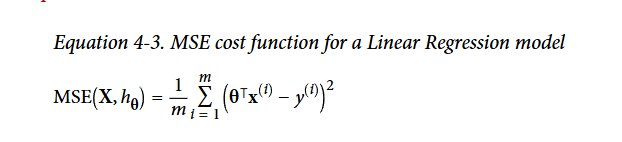

As you can see,we calculate mse with h0 using theta.

And for Minimize them with the cost function,we can use L.Algebra:
>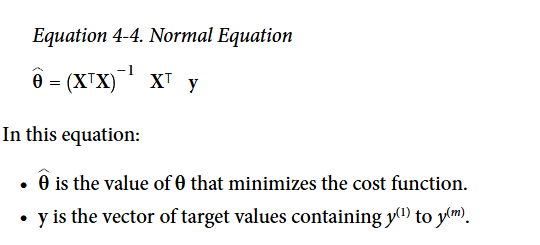


Text(0, 0.5, 'y')

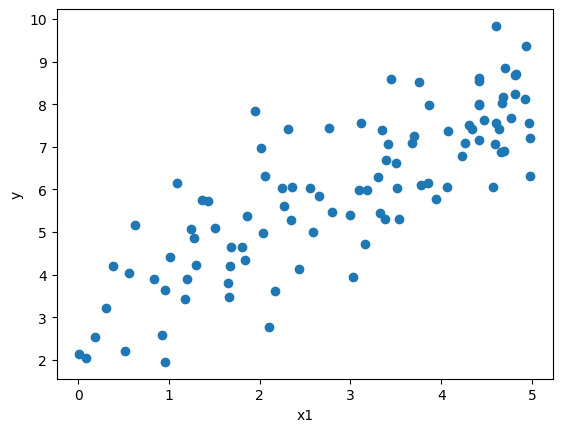

In [2]:
X = 5 * np.random.rand(100,1) #data
y = 3 + 1 * X + np.random.randn(100,1) #samples [max:5*(4*5)]

#Custom data:
plt.scatter(X,y)
plt.xlabel("x1")
plt.ylabel("y")

In [3]:
#Normal equation for find low cost function:
#x matrix
X_b=np.c_[np.ones((100,1)),X]

#normal equa:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #inverse matrix-vector camputating and Gaussian Process
#t is the transposte


In [4]:
print(theta_best) #

[[2.97931671]
 [1.0313295 ]]


### Predictions:
We need use tha same o aproximately nums

In [5]:
x_new_data = np.array([[0],[3]])
x_new_data_y = np.c_[np.ones((2,1)),x_new_data]

y_predict=x_new_data_y.dot(theta_best)

print(y_predict)

[[2.97931671]
 [6.07330523]]


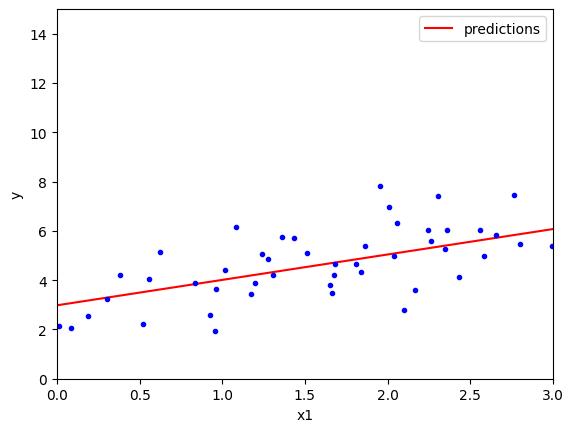

In [6]:
plt.plot(x_new_data,y_predict,"r-",label="predictions")
plt.legend()
plt.xlabel("x1")
plt.ylabel("y")
plt.plot(X,y,"b.")
plt.axis([0,3,0,15])
plt.show()

In [7]:
#comparing to l reg:

from sklearn.linear_model import LinearRegression

lg=LinearRegression()
lg.fit(X,y)

#theta:
lg.intercept_,lg.coef_


(array([2.97931671]), array([[1.0313295]]))

In [8]:
lg_predicts= lg.predict(x_new_data)
print(lg_predicts)

[[2.97931671]
 [6.07330523]]


#### Compunting theta of l.reg using algebra:

In [11]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6) #target and l.g params
theta_best_svd # :  X(pseudoinv).dot(y)

#psoudoinverse:
theta_ps=np.linalg.pinv(X_b).dot(y)

print(theta_best_svd)

[[2.97931671]
 [1.0313295 ]]
